## Motivation

In this notebook, we expand the previous experiment on the idea declared in section 1.5.5 (see the notebook `action-mnist-mnistc-base.ipynb`), by using a simple convolutional neural network instead of multi-layer perceptron. The code are the same as the previous experiment except for model structure and optimizer.

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tqdm import tqdm

!wget https://raw.githubusercontent.com/shuiruge/maxent/master/actions/utils.py
from utils import GradientRelativeEntropy

tf.random.set_seed(42)

--2024-08-20 01:01:23--  https://raw.githubusercontent.com/shuiruge/maxent/master/actions/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4665 (4.6K) [text/plain]
Saving to: ‘utils.py’

utils.py            100%[===================>]   4.56K  --.-KB/s    in 0s      

2024-08-20 01:01:24 (62.2 MB/s) - ‘utils.py’ saved [4665/4665]



## The MNIST Dataset

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

def preprocess(x):
    x = x.astype('float32').reshape([-1, 28, 28, 1])
    x = x / 255.0
    return x

x_train = preprocess(x_train)
x_test = preprocess(x_test)
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## Train a CNN Model with the "Gradient Loss"

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Conv2D(64, 3),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, 'relu'),
    tf.keras.layers.Dense(10),
])

gradient_loss_fn = GradientRelativeEntropy(model)

In [ ]:
optimizer = tf.optimizers.AdamW()

@tf.function
def train_step(x, y):
    with tf.GradientTape() as tape:
        gradient_loss = gradient_loss_fn(x, y)
        loss = tf.reduce_mean(gradient_loss.loss)
    grads = tape.gradient(loss, model.variables)
    optimizer.apply_gradients(zip(grads, model.variables))
    return loss

In [ ]:
def evaluate(model):
    return accuracy_score(y_test, tf.argmax(model(x_test), axis=1))

In [ ]:
ds = tf.data.Dataset.from_tensor_slices(
    (x_train, tf.one_hot(y_train, 10))
)
ds = ds.batch(64)

In [ ]:
for epoch in range(50):
    for x, y in tqdm(ds):
        loss = train_step(x, y)
    print(f'epoch: {epoch}, loss: {loss.numpy():.4f}, val_accuracy: {evaluate(model):.4f}')

100%|██████████| 938/938 [00:12<00:00, 73.25it/s] 


epoch: 0, loss: 0.1178, val_accuracy: 0.9637


100%|██████████| 938/938 [00:10<00:00, 91.74it/s] 


epoch: 1, loss: 0.1110, val_accuracy: 0.9742


100%|██████████| 938/938 [00:06<00:00, 150.97it/s]


epoch: 2, loss: 0.1108, val_accuracy: 0.9779


100%|██████████| 938/938 [00:06<00:00, 152.92it/s]


epoch: 3, loss: 0.1094, val_accuracy: 0.9795


100%|██████████| 938/938 [00:06<00:00, 153.19it/s]


epoch: 4, loss: 0.1100, val_accuracy: 0.9804


100%|██████████| 938/938 [00:06<00:00, 151.62it/s]


epoch: 5, loss: 0.1086, val_accuracy: 0.9808


100%|██████████| 938/938 [00:06<00:00, 151.93it/s]


epoch: 6, loss: 0.1091, val_accuracy: 0.9819


100%|██████████| 938/938 [00:10<00:00, 91.72it/s] 


epoch: 7, loss: 0.1096, val_accuracy: 0.9819


100%|██████████| 938/938 [00:06<00:00, 152.26it/s]


epoch: 8, loss: 0.1087, val_accuracy: 0.9828


100%|██████████| 938/938 [00:06<00:00, 155.66it/s]


epoch: 9, loss: 0.1085, val_accuracy: 0.9829


100%|██████████| 938/938 [00:06<00:00, 151.86it/s]


epoch: 10, loss: 0.1088, val_accuracy: 0.9834


100%|██████████| 938/938 [00:06<00:00, 155.77it/s]


epoch: 11, loss: 0.1079, val_accuracy: 0.9841


100%|██████████| 938/938 [00:06<00:00, 152.17it/s]


epoch: 12, loss: 0.1078, val_accuracy: 0.9849


100%|██████████| 938/938 [00:06<00:00, 155.27it/s]


epoch: 13, loss: 0.1074, val_accuracy: 0.9850


100%|██████████| 938/938 [00:06<00:00, 152.68it/s]


epoch: 14, loss: 0.1060, val_accuracy: 0.9853


100%|██████████| 938/938 [00:06<00:00, 155.79it/s]


epoch: 15, loss: 0.1070, val_accuracy: 0.9854


100%|██████████| 938/938 [00:06<00:00, 152.28it/s]


epoch: 16, loss: 0.1069, val_accuracy: 0.9848


100%|██████████| 938/938 [00:06<00:00, 155.50it/s]


epoch: 17, loss: 0.1062, val_accuracy: 0.9850


100%|██████████| 938/938 [00:06<00:00, 152.43it/s]


epoch: 18, loss: 0.1053, val_accuracy: 0.9854


100%|██████████| 938/938 [00:06<00:00, 155.85it/s]


epoch: 19, loss: 0.1062, val_accuracy: 0.9848


100%|██████████| 938/938 [00:06<00:00, 152.74it/s]


epoch: 20, loss: 0.1050, val_accuracy: 0.9851


100%|██████████| 938/938 [00:06<00:00, 154.95it/s]


epoch: 21, loss: 0.1025, val_accuracy: 0.9856


100%|██████████| 938/938 [00:06<00:00, 153.19it/s]


epoch: 22, loss: 0.1017, val_accuracy: 0.9867


100%|██████████| 938/938 [00:06<00:00, 152.89it/s]


epoch: 23, loss: 0.1013, val_accuracy: 0.9867


100%|██████████| 938/938 [00:06<00:00, 147.28it/s]


epoch: 24, loss: 0.1007, val_accuracy: 0.9871


100%|██████████| 938/938 [00:06<00:00, 155.71it/s]


epoch: 25, loss: 0.1003, val_accuracy: 0.9877


100%|██████████| 938/938 [00:06<00:00, 152.20it/s]


epoch: 26, loss: 0.0997, val_accuracy: 0.9878


100%|██████████| 938/938 [00:06<00:00, 155.95it/s]


epoch: 27, loss: 0.1000, val_accuracy: 0.9875


100%|██████████| 938/938 [00:06<00:00, 152.42it/s]


epoch: 28, loss: 0.0989, val_accuracy: 0.9877


100%|██████████| 938/938 [00:06<00:00, 155.85it/s]


epoch: 29, loss: 0.0993, val_accuracy: 0.9877


100%|██████████| 938/938 [00:06<00:00, 152.20it/s]


epoch: 30, loss: 0.1002, val_accuracy: 0.9879


100%|██████████| 938/938 [00:06<00:00, 155.53it/s]


epoch: 31, loss: 0.0994, val_accuracy: 0.9877


100%|██████████| 938/938 [00:06<00:00, 152.85it/s]


epoch: 32, loss: 0.0995, val_accuracy: 0.9873


100%|██████████| 938/938 [00:06<00:00, 155.36it/s]


epoch: 33, loss: 0.0992, val_accuracy: 0.9879


100%|██████████| 938/938 [00:06<00:00, 152.46it/s]


epoch: 34, loss: 0.0992, val_accuracy: 0.9875


100%|██████████| 938/938 [00:06<00:00, 154.89it/s]


epoch: 35, loss: 0.0994, val_accuracy: 0.9874


100%|██████████| 938/938 [00:06<00:00, 152.09it/s]


epoch: 36, loss: 0.0992, val_accuracy: 0.9877


100%|██████████| 938/938 [00:06<00:00, 154.55it/s]


epoch: 37, loss: 0.0998, val_accuracy: 0.9876


100%|██████████| 938/938 [00:06<00:00, 153.57it/s]


epoch: 38, loss: 0.0999, val_accuracy: 0.9874


100%|██████████| 938/938 [00:06<00:00, 154.87it/s]


epoch: 39, loss: 0.0994, val_accuracy: 0.9873


100%|██████████| 938/938 [00:06<00:00, 153.85it/s]


epoch: 40, loss: 0.0991, val_accuracy: 0.9875


100%|██████████| 938/938 [00:06<00:00, 154.46it/s]


epoch: 41, loss: 0.0990, val_accuracy: 0.9877


100%|██████████| 938/938 [00:06<00:00, 154.17it/s]


epoch: 42, loss: 0.0992, val_accuracy: 0.9875


100%|██████████| 938/938 [00:06<00:00, 152.18it/s]


epoch: 43, loss: 0.0992, val_accuracy: 0.9871


100%|██████████| 938/938 [00:06<00:00, 148.48it/s]


epoch: 44, loss: 0.0993, val_accuracy: 0.9872


100%|██████████| 938/938 [00:06<00:00, 154.17it/s]


epoch: 45, loss: 0.0994, val_accuracy: 0.9872


100%|██████████| 938/938 [00:06<00:00, 152.41it/s]


epoch: 46, loss: 0.0994, val_accuracy: 0.9874


100%|██████████| 938/938 [00:06<00:00, 155.04it/s]


epoch: 47, loss: 0.0989, val_accuracy: 0.9880


100%|██████████| 938/938 [00:06<00:00, 153.19it/s]


epoch: 48, loss: 0.0987, val_accuracy: 0.9879


100%|██████████| 938/938 [00:06<00:00, 155.03it/s]


epoch: 49, loss: 0.0986, val_accuracy: 0.9882


In [ ]:
evaluate(model)

0.9882

## Baseline Model with the Usual Loss

For comparing, we use the same architecture for baseline model.

In [ ]:
baseline_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Conv2D(64, 3),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, 'relu'),
    tf.keras.layers.Dense(10),
])

baseline_model.compile(
    optimizer=tf.optimizers.AdamW(),
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [ ]:
baseline_model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=50,
    validation_data=(x_test, y_test),
    verbose=2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)]
)

Epoch 1/50
938/938 - 9s - 9ms/step - accuracy: 0.9621 - loss: 0.1270 - val_accuracy: 0.9842 - val_loss: 0.0487
Epoch 2/50
938/938 - 7s - 7ms/step - accuracy: 0.9885 - loss: 0.0377 - val_accuracy: 0.9847 - val_loss: 0.0485
Epoch 3/50
938/938 - 4s - 4ms/step - accuracy: 0.9932 - loss: 0.0216 - val_accuracy: 0.9846 - val_loss: 0.0506
Epoch 4/50
938/938 - 4s - 4ms/step - accuracy: 0.9954 - loss: 0.0149 - val_accuracy: 0.9860 - val_loss: 0.0504
Epoch 5/50
938/938 - 4s - 5ms/step - accuracy: 0.9960 - loss: 0.0121 - val_accuracy: 0.9891 - val_loss: 0.0411
Epoch 6/50
938/938 - 4s - 4ms/step - accuracy: 0.9969 - loss: 0.0087 - val_accuracy: 0.9870 - val_loss: 0.0547
Epoch 7/50
938/938 - 6s - 6ms/step - accuracy: 0.9975 - loss: 0.0076 - val_accuracy: 0.9881 - val_loss: 0.0430
Epoch 8/50
938/938 - 4s - 4ms/step - accuracy: 0.9979 - loss: 0.0064 - val_accuracy: 0.9914 - val_loss: 0.0436
Epoch 9/50
938/938 - 5s - 5ms/step - accuracy: 0.9982 - loss: 0.0058 - val_accuracy: 0.9907 - val_loss: 0.0424
E

In [ ]:
evaluate(baseline_model)

0.99

## Model Robustness

Now, we compare the robustness of the model and the baseline. To do so, we add Gaussian and uniform noises to the test data and check the accuracy.

In [ ]:
stddevs, model_accs, baseline_accs = [], [], []
for stddev in tqdm(np.linspace(0, 0.5, 50)):
    stddevs.append(stddev)
    # x_test_noised = x_test + tf.random.normal(tf.shape(x_test)) * stddev
    x_test_noised = x_test + tf.random.uniform(tf.shape(x_test), -1., 1.) * stddev
    x_test_noised = tf.clip_by_value(x_test_noised, 0., 1.)
    model_accs.append(
        accuracy_score(y_test, tf.argmax(model(x_test_noised), axis=1))
    )
    baseline_accs.append(
        accuracy_score(y_test, tf.argmax(baseline_model(x_test_noised), axis=1))
    )

100%|██████████| 50/50 [00:15<00:00,  3.18it/s]


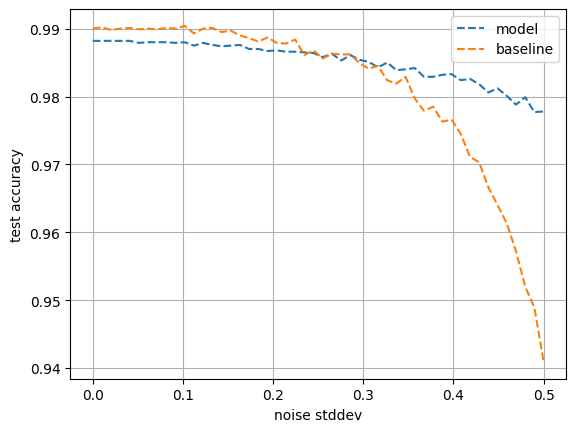

In [ ]:
plt.plot(stddevs, model_accs, '--', label='model')
plt.plot(stddevs, baseline_accs, '--', label='baseline')
plt.xlabel('noise stddev')
plt.ylabel('test accuracy')
plt.legend()
plt.grid()
plt.show()

## MNIST-C

In this section, we are to exame the model and the baseline model on the [MNIST-C](https://github.com/google-research/mnist-c) dataset, which was designed for evaluating the robustness of models trained on MNIST dataset.

We have downloaded the ZIP file from [here](https://zenodo.org/records/3239543), and unpacked into the current folder.

In [ ]:
# !unzip -x mnist_c.zip -d ./

Or, load MNIST-C dataset from drive, where I have uploaded the ZIP file. This will greatly speed up the progress.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!unzip /content/drive/MyDrive/mnist_c.zip -d ./

Mounted at /content/drive
Archive:  /content/drive/MyDrive/mnist_c.zip
   creating: ./mnist_c/
   creating: ./mnist_c/impulse_noise/
  inflating: ./mnist_c/impulse_noise/test_images.npy  
  inflating: ./mnist_c/impulse_noise/train_images.npy  
  inflating: ./mnist_c/impulse_noise/test_labels.npy  
  inflating: ./mnist_c/impulse_noise/train_labels.npy  
   creating: ./mnist_c/canny_edges/
  inflating: ./mnist_c/canny_edges/test_images.npy  
  inflating: ./mnist_c/canny_edges/train_images.npy  
  inflating: ./mnist_c/canny_edges/test_labels.npy  
  inflating: ./mnist_c/canny_edges/train_labels.npy  
   creating: ./mnist_c/zigzag/
  inflating: ./mnist_c/zigzag/test_images.npy  
  inflating: ./mnist_c/zigzag/train_images.npy  
  inflating: ./mnist_c/zigzag/test_labels.npy  
  inflating: ./mnist_c/zigzag/train_labels.npy  
   creating: ./mnist_c/dotted_line/
  inflating: ./mnist_c/dotted_line/test_images.npy  
  inflating: ./mnist_c/dotted_line/train_images.npy  
  inflating: ./mnist_c/dott

In [ ]:
print('noise type -- model accuracy -- baseline accuracy -- out perform')
for noise_type in os.listdir('mnist_c'):
    x_eval = np.load(f'mnist_c/{noise_type}/test_images.npy')
    y_eval = np.load(f'mnist_c/{noise_type}/test_labels.npy')

    x_eval = preprocess(x_eval)
    y_eval = y_eval.astype('float32')

    model_eval = accuracy_score(y_eval, tf.argmax(model(x_eval), axis=1))
    baseline_eval = accuracy_score(y_eval, tf.argmax(baseline_model(x_eval), axis=1))
    out_perform = model_eval - baseline_eval

    print(f'{noise_type} -- {model_eval} -- {baseline_eval} -- {out_perform*100:.1f}%')

noise type -- model accuracy -- baseline accuracy -- out perform
motion_blur -- 0.9277 -- 0.9479 -- -2.0%
rotate -- 0.9159 -- 0.9158 -- 0.0%
stripe -- 0.7576 -- 0.9641 -- -20.6%
brightness -- 0.9519 -- 0.7718 -- 18.0%
glass_blur -- 0.9284 -- 0.879 -- 4.9%
identity -- 0.9882 -- 0.99 -- -0.2%
spatter -- 0.9794 -- 0.9814 -- -0.2%
impulse_noise -- 0.9388 -- 0.8259 -- 11.3%
zigzag -- 0.9018 -- 0.8355 -- 6.6%
scale -- 0.8981 -- 0.9386 -- -4.0%
shear -- 0.9685 -- 0.9737 -- -0.5%
translate -- 0.4881 -- 0.4913 -- -0.3%
dotted_line -- 0.977 -- 0.9466 -- 3.0%
fog -- 0.7413 -- 0.7258 -- 1.5%
canny_edges -- 0.8924 -- 0.7382 -- 15.4%
shot_noise -- 0.9797 -- 0.9621 -- 1.8%


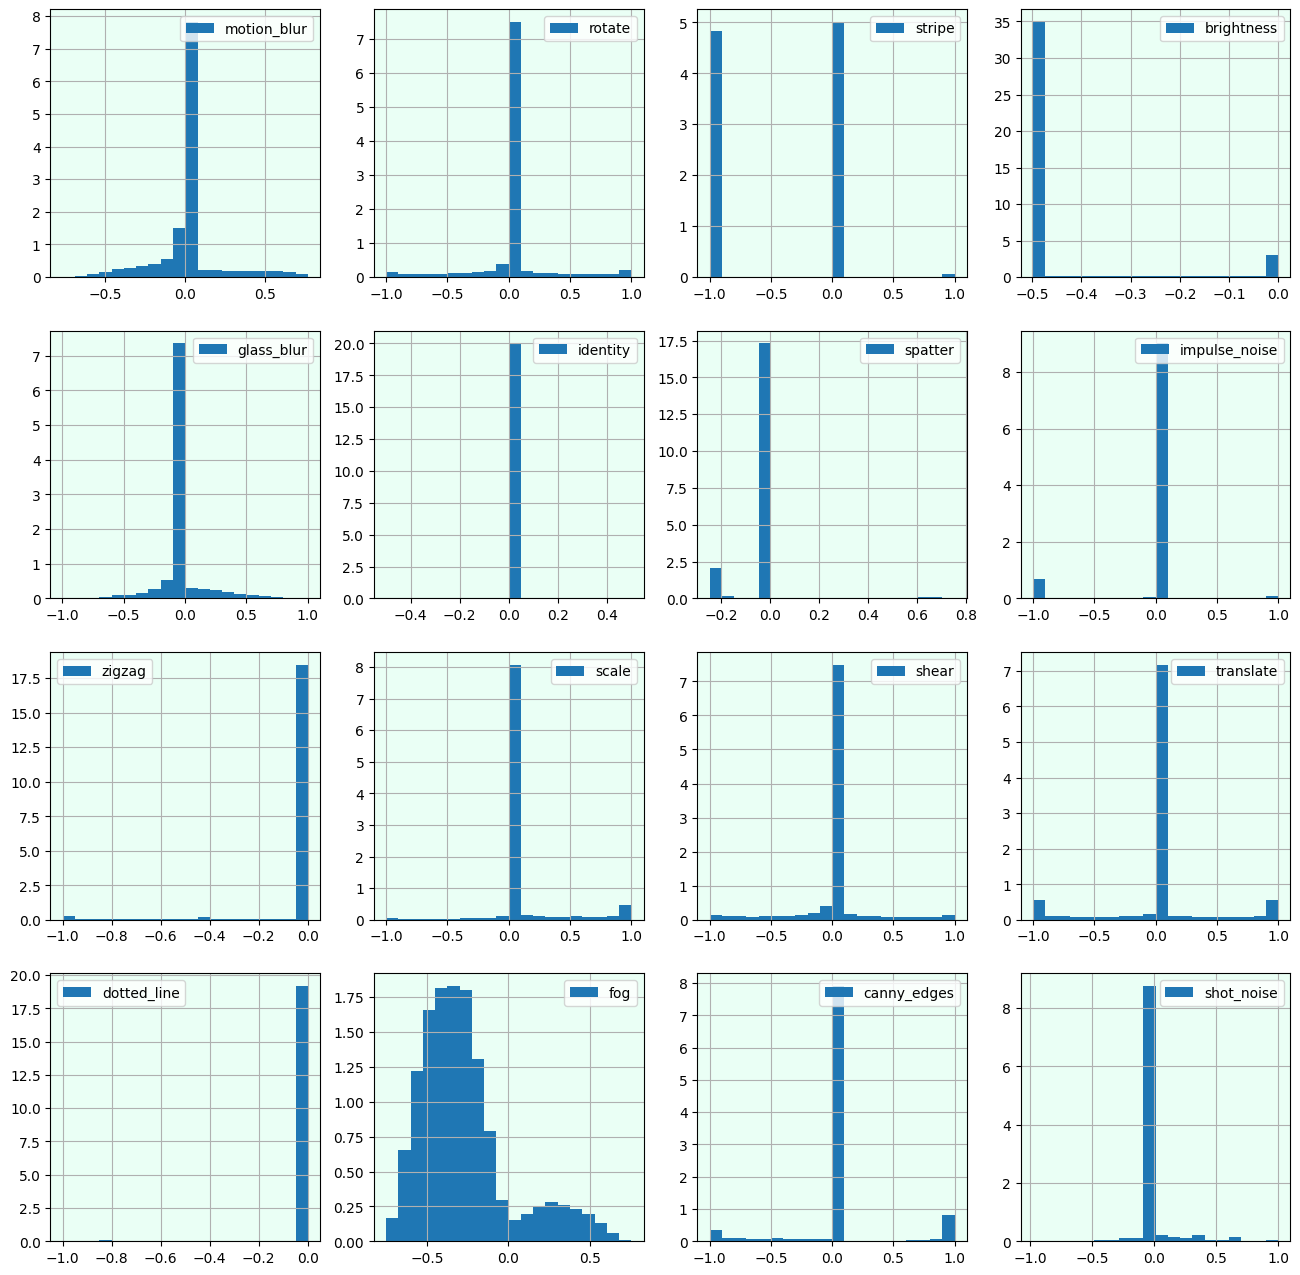

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(16, 16))
for i, noise_type in enumerate(os.listdir('mnist_c')):
    j = i // 4
    k = i % 4
    ax = axs[j][k]

    x_eval = np.load(f'mnist_c/{noise_type}/test_images.npy')
    x_eval = preprocess(x_eval)

    diff = (x_test - x_eval).reshape([-1])
    ax.hist(diff, 20, label=noise_type, density=True)
    ax.legend()
    ax.grid()
    ax.set_facecolor('#eafff5')

plt.show()

## Conclusion

We have constructed a simple convolutional neural network. Model was trained by minimizing the "gradient loss". We also trained a baseline model with the same architecture, by minimizing the loss as usual.

- Overfitting is naturall absent in minimizing the "gradient loss".
- For Gaussian and uniform noises, the robustness is greatly out-performs the baseline.
- Examed on the MNIST-C dataset, robustness out-performs the baseline for most of the noise types.
- Even though there is no other trick employed here, this result is significantly comparable with the methods listed in the figure 3 of the [MNIST-C paper](https://arxiv.org/pdf/1906.02337).